# Accessing AWS S3 Buckets from the command line

## Short tutorial on awscli
- install on ubuntu with apt-get install awscli
- can also install with python
- library environment can get pootched

In [1]:
!aws s3 ls --help


Unknown options: --help


In [2]:
# Tony should add groff to the container

In [3]:
! aws s3 ls help

LS()                                                                      LS()



NAME
       ls -

DESCRIPTION
       List  S3  objects and common prefixes under a prefix or all S3 buckets.
       Note that the --output and --no-paginate arguments are ignored for this
       command.

       See 'aws help' for descriptions of global parameters.

SYNOPSIS
            ls
          <S3Uri> or NONE
          [--recursive]
          [--page-size <value>]
          [--human-readable]
          [--summarize]
          [--request-payer <value>]

OPTIONS
       paths (string)

       --recursive  (boolean)  Command  is  performed  on all files or objects
       under the specified directory or prefix.

       --page-size (integer) The number of results to return in each  response
       to  a  list operation. The default value is 1000 (the maximum allowed).
       Using a lower value may help if an operation times out.

       --human-readable (boolean) Displays file sizes in human  readable  

# Simple ls command

### shows all the buckets in my account - BUT not foreign buckets

In [4]:
! aws s3 ls

2019-09-02 19:25:08 cf-templates-k60v3e6ss69n-us-west-2
2017-10-24 01:18:52 cloudsploitlambda-471850042218
2017-07-18 14:20:35 erosodc1
2019-07-17 10:43:40 ga-africa-provisional
2018-10-31 04:32:27 ga-autobots-elk-471850042218-logsstac-trailbucket-rk21t6aox8cf
2019-09-03 00:55:08 ga-config-471850042218
2020-02-26 04:59:49 ga-et-data
2017-08-31 22:23:35 ga-odc-eros-archive-west
2019-05-02 17:11:57 ga-odc-eros-kops-west
2018-07-25 07:15:30 guarddutyslacklambda-471850042218
2019-10-16 04:41:24 guarddutyteamslambda-471850042218
2017-05-26 00:29:35 lcmap-washington-state
2018-02-07 22:28:56 usgs-devs-tfstate


# But I know my bucket's NAME its:

## ga-et-data-west

- tony set this up to allow read access from CHS Development Account
- its in the Aussies account so USGS/CHS is a foreign account to this bucket
- he could add other guests or make it public in the future
- ask Google or tony how you do this
    - oh and its codified and in github - so we all can remember the details

In [5]:
! aws s3 ls ga-et-data/MODIS_NDVI/

                           PRE 2013/
                           PRE 2014/
                           PRE 2015/
                           PRE 2016/


---
---
---
[cartoon](https://raw.githubusercontent.com/tonybutzer/assets/master/et/et-infra-cartoon.png)

---
---
---

# Object storage is almost like a directory tree

- close enuf for govt work

## Terms

- prefix -is-like- path
- key -is-like- filename
- bucket-name - is-like- a disk letter C: or /home/butzer


In [6]:
# Lets look at the readme
# note you need the url descriptor s3:// when using copy
# the trailing dash '-' means copy to standard out

! aws s3 cp s3://ga-et-data/readme-bucket.md - 

# ga et bucket


This bucket is for Evaporation input data


contact owner is

tonybutzer@gmail.com


# You can also copy objects to and from buckets
## to local block storage - aka local disk 
- cloud people call this EBS - Elastic Block Storage
    - comes in rotating rust or *SSD* - you just get charde more for fast disk
    
# You can read objects into python just like files

- there is something called s3fuse - that makes these objects look just like a file 
- we may explore that down the road for ET - tony

In [7]:
# ok so lets do that again

! aws s3 ls ga-et-data

                           PRE MODIS_NDVI/
                           PRE inputsv0/
                           PRE lunch/
2020-02-26 05:11:08        100 readme-bucket.md


In [8]:
! aws s3 ls ga-et-data/inputsv0/

                           PRE MODIS_NDVI/
                           PRE air_temperature/
                           PRE precipitation/
                           PRE soilData/


In [9]:
# how about with url syntax

! aws s3 ls s3://ga-et-data/inputsv0/

                           PRE MODIS_NDVI/
                           PRE air_temperature/
                           PRE precipitation/
                           PRE soilData/


In [10]:
# recursive 
! aws s3 ls s3://ga-et-data/inputsv0/ --recursive

2020-02-26 05:14:32         83 inputsv0/MODIS_NDVI/2013/2013001.1_km_16_days_NDVI.tfw
2020-02-26 05:14:32       1825 inputsv0/MODIS_NDVI/2013/2013001.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:14:32         83 inputsv0/MODIS_NDVI/2013/2013002.1_km_16_days_NDVI.tfw
2020-02-26 05:14:32       1818 inputsv0/MODIS_NDVI/2013/2013002.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:14:32         83 inputsv0/MODIS_NDVI/2013/2013003.1_km_16_days_NDVI.tfw
2020-02-26 05:14:33       1813 inputsv0/MODIS_NDVI/2013/2013003.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:14:33         83 inputsv0/MODIS_NDVI/2013/2013004.1_km_16_days_NDVI.tfw
2020-02-26 05:14:32       1814 inputsv0/MODIS_NDVI/2013/2013004.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:14:33         83 inputsv0/MODIS_NDVI/2013/2013005.1_km_16_days_NDVI.tfw
2020-02-26 05:14:45       1821 inputsv0/MODIS_NDVI/2013/2013005.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:14:45         83 inputsv0/MODIS_NDVI/2013/2013006.1_km_16_days_NDVI.tfw
2020-02-26 05:

2020-02-26 05:17:57       1830 inputsv0/MODIS_NDVI/2013/2013048.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:17:58         83 inputsv0/MODIS_NDVI/2013/2013049.1_km_16_days_NDVI.tfw
2020-02-26 05:18:04       1814 inputsv0/MODIS_NDVI/2013/2013049.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:18:04         83 inputsv0/MODIS_NDVI/2013/2013050.1_km_16_days_NDVI.tfw
2020-02-26 05:18:11       1822 inputsv0/MODIS_NDVI/2013/2013050.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:18:12         83 inputsv0/MODIS_NDVI/2013/2013051.1_km_16_days_NDVI.tfw
2020-02-26 05:18:13       1824 inputsv0/MODIS_NDVI/2013/2013051.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:18:13         83 inputsv0/MODIS_NDVI/2013/2013052.1_km_16_days_NDVI.tfw
2020-02-26 05:18:17       1827 inputsv0/MODIS_NDVI/2013/2013052.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:18:17         83 inputsv0/MODIS_NDVI/2013/2013053.1_km_16_days_NDVI.tfw
2020-02-26 05:18:25       1820 inputsv0/MODIS_NDVI/2013/2013053.1_km_16_days_NDVI.tif.aux.xml
2020-0

2020-02-26 05:28:33       1787 inputsv0/MODIS_NDVI/2013/2013160.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:28:33         83 inputsv0/MODIS_NDVI/2013/2013161.1_km_16_days_NDVI.tfw
2020-02-26 05:28:35       1795 inputsv0/MODIS_NDVI/2013/2013161.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:28:42         83 inputsv0/MODIS_NDVI/2013/2013162.1_km_16_days_NDVI.tfw
2020-02-26 05:28:43       1804 inputsv0/MODIS_NDVI/2013/2013162.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:28:44         83 inputsv0/MODIS_NDVI/2013/2013163.1_km_16_days_NDVI.tfw
2020-02-26 05:29:03       1801 inputsv0/MODIS_NDVI/2013/2013163.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:28:51         83 inputsv0/MODIS_NDVI/2013/2013164.1_km_16_days_NDVI.tfw
2020-02-26 05:28:59       1801 inputsv0/MODIS_NDVI/2013/2013164.1_km_16_days_NDVI.tif.aux.xml
2020-02-26 05:28:59         83 inputsv0/MODIS_NDVI/2013/2013165.1_km_16_days_NDVI.tfw
2020-02-26 05:29:04       1803 inputsv0/MODIS_NDVI/2013/2013165.1_km_16_days_NDVI.tif.aux.xml
2020-0

2020-02-26 05:05:01         83 inputsv0/air_temperature/tavg_005.tfw
2020-02-26 05:05:01   13208882 inputsv0/air_temperature/tavg_005.tif
2020-02-26 05:05:01        623 inputsv0/air_temperature/tavg_005.tif.aux.xml
2020-02-26 05:05:01          5 inputsv0/air_temperature/tavg_005.tif.vat.cpg
2020-02-26 05:05:01       2678 inputsv0/air_temperature/tavg_005.tif.vat.dbf
2020-02-26 05:05:01         83 inputsv0/air_temperature/tavg_006.tfw
2020-02-26 05:05:01   13139982 inputsv0/air_temperature/tavg_006.tif
2020-02-26 05:05:01        624 inputsv0/air_temperature/tavg_006.tif.aux.xml
2020-02-26 05:05:01          5 inputsv0/air_temperature/tavg_006.tif.vat.cpg
2020-02-26 05:05:02       2828 inputsv0/air_temperature/tavg_006.tif.vat.dbf
2020-02-26 05:05:02         83 inputsv0/air_temperature/tavg_007.tfw
2020-02-26 05:05:02   13035294 inputsv0/air_temperature/tavg_007.tif
2020-02-26 05:05:01        624 inputsv0/air_temperature/tavg_007.tif.aux.xml
2020-02-26 05:05:01          5 inputsv0/air_tem

2020-02-26 05:05:07       2828 inputsv0/air_temperature/tavg_047.tif.vat.dbf
2020-02-26 05:05:07         83 inputsv0/air_temperature/tavg_048.tfw
2020-02-26 05:05:07   13279911 inputsv0/air_temperature/tavg_048.tif
2020-02-26 05:05:07        624 inputsv0/air_temperature/tavg_048.tif.aux.xml
2020-02-26 05:05:07          5 inputsv0/air_temperature/tavg_048.tif.vat.cpg
2020-02-26 05:05:07       2738 inputsv0/air_temperature/tavg_048.tif.vat.dbf
2020-02-26 05:05:07         83 inputsv0/air_temperature/tavg_049.tfw
2020-02-26 05:05:07   13208651 inputsv0/air_temperature/tavg_049.tif
2020-02-26 05:05:07        624 inputsv0/air_temperature/tavg_049.tif.aux.xml
2020-02-26 05:05:07          5 inputsv0/air_temperature/tavg_049.tif.vat.cpg
2020-02-26 05:05:07       2648 inputsv0/air_temperature/tavg_049.tif.vat.dbf
2020-02-26 05:05:07         83 inputsv0/air_temperature/tavg_050.tfw
2020-02-26 05:05:07   13229430 inputsv0/air_temperature/tavg_050.tif
2020-02-26 05:05:07        624 inputsv0/air_tem

2020-02-26 05:05:12       2678 inputsv0/air_temperature/tavg_091.tif.vat.dbf
2020-02-26 05:05:12         83 inputsv0/air_temperature/tavg_092.tfw
2020-02-26 05:05:12   13515355 inputsv0/air_temperature/tavg_092.tif
2020-02-26 05:05:12        624 inputsv0/air_temperature/tavg_092.tif.aux.xml
2020-02-26 05:05:12          5 inputsv0/air_temperature/tavg_092.tif.vat.cpg
2020-02-26 05:05:12       2618 inputsv0/air_temperature/tavg_092.tif.vat.dbf
2020-02-26 05:05:12         83 inputsv0/air_temperature/tavg_093.tfw
2020-02-26 05:05:12   13543312 inputsv0/air_temperature/tavg_093.tif
2020-02-26 05:05:12        624 inputsv0/air_temperature/tavg_093.tif.aux.xml
2020-02-26 05:05:12          5 inputsv0/air_temperature/tavg_093.tif.vat.cpg
2020-02-26 05:05:13       2558 inputsv0/air_temperature/tavg_093.tif.vat.dbf
2020-02-26 05:05:13         83 inputsv0/air_temperature/tavg_094.tfw
2020-02-26 05:05:13   13498192 inputsv0/air_temperature/tavg_094.tif
2020-02-26 05:05:13        623 inputsv0/air_tem

2020-02-26 05:05:20        624 inputsv0/air_temperature/tavg_144.tif.aux.xml
2020-02-26 05:05:20          5 inputsv0/air_temperature/tavg_144.tif.vat.cpg
2020-02-26 05:05:20       2228 inputsv0/air_temperature/tavg_144.tif.vat.dbf
2020-02-26 05:05:20         83 inputsv0/air_temperature/tavg_145.tfw
2020-02-26 05:05:20   13323697 inputsv0/air_temperature/tavg_145.tif
2020-02-26 05:05:20        624 inputsv0/air_temperature/tavg_145.tif.aux.xml
2020-02-26 05:05:20          5 inputsv0/air_temperature/tavg_145.tif.vat.cpg
2020-02-26 05:05:20       2408 inputsv0/air_temperature/tavg_145.tif.vat.dbf
2020-02-26 05:05:20         83 inputsv0/air_temperature/tavg_146.tfw
2020-02-26 05:05:20   13443659 inputsv0/air_temperature/tavg_146.tif
2020-02-26 05:05:20        621 inputsv0/air_temperature/tavg_146.tif.aux.xml
2020-02-26 05:05:20          5 inputsv0/air_temperature/tavg_146.tif.vat.cpg
2020-02-26 05:05:20       2078 inputsv0/air_temperature/tavg_146.tif.vat.dbf
2020-02-26 05:05:20         83 

2020-02-26 05:05:27         83 inputsv0/air_temperature/tavg_187.tfw
2020-02-26 05:05:27   13034430 inputsv0/air_temperature/tavg_187.tif
2020-02-26 05:05:27        624 inputsv0/air_temperature/tavg_187.tif.aux.xml
2020-02-26 05:05:27          5 inputsv0/air_temperature/tavg_187.tif.vat.cpg
2020-02-26 05:05:27       2138 inputsv0/air_temperature/tavg_187.tif.vat.dbf
2020-02-26 05:05:27         83 inputsv0/air_temperature/tavg_188.tfw
2020-02-26 05:05:27   12981435 inputsv0/air_temperature/tavg_188.tif
2020-02-26 05:05:27        624 inputsv0/air_temperature/tavg_188.tif.aux.xml
2020-02-26 05:05:27          5 inputsv0/air_temperature/tavg_188.tif.vat.cpg
2020-02-26 05:05:27       2048 inputsv0/air_temperature/tavg_188.tif.vat.dbf
2020-02-26 05:05:27         83 inputsv0/air_temperature/tavg_189.tfw
2020-02-26 05:05:27   13000058 inputsv0/air_temperature/tavg_189.tif
2020-02-26 05:05:27        623 inputsv0/air_temperature/tavg_189.tif.aux.xml
2020-02-26 05:05:27          5 inputsv0/air_tem

2020-02-26 05:05:33        624 inputsv0/air_temperature/tavg_230.tif.aux.xml
2020-02-26 05:05:33          5 inputsv0/air_temperature/tavg_230.tif.vat.cpg
2020-02-26 05:05:33       2198 inputsv0/air_temperature/tavg_230.tif.vat.dbf
2020-02-26 05:05:33         83 inputsv0/air_temperature/tavg_231.tfw
2020-02-26 05:05:33   13380314 inputsv0/air_temperature/tavg_231.tif
2020-02-26 05:05:33        624 inputsv0/air_temperature/tavg_231.tif.aux.xml
2020-02-26 05:05:33          5 inputsv0/air_temperature/tavg_231.tif.vat.cpg
2020-02-26 05:05:33       2108 inputsv0/air_temperature/tavg_231.tif.vat.dbf
2020-02-26 05:05:33         83 inputsv0/air_temperature/tavg_232.tfw
2020-02-26 05:05:33   13354376 inputsv0/air_temperature/tavg_232.tif
2020-02-26 05:05:33        624 inputsv0/air_temperature/tavg_232.tif.aux.xml
2020-02-26 05:05:33          5 inputsv0/air_temperature/tavg_232.tif.vat.cpg
2020-02-26 05:05:33       2168 inputsv0/air_temperature/tavg_232.tif.vat.dbf
2020-02-26 05:05:33         83 

2020-02-26 05:05:38        624 inputsv0/air_temperature/tavg_273.tif.aux.xml
2020-02-26 05:05:38          5 inputsv0/air_temperature/tavg_273.tif.vat.cpg
2020-02-26 05:05:38       2288 inputsv0/air_temperature/tavg_273.tif.vat.dbf
2020-02-26 05:05:38         83 inputsv0/air_temperature/tavg_274.tfw
2020-02-26 05:05:38   13489012 inputsv0/air_temperature/tavg_274.tif
2020-02-26 05:05:38        623 inputsv0/air_temperature/tavg_274.tif.aux.xml
2020-02-26 05:05:38          5 inputsv0/air_temperature/tavg_274.tif.vat.cpg
2020-02-26 05:05:38       2468 inputsv0/air_temperature/tavg_274.tif.vat.dbf
2020-02-26 05:05:38         83 inputsv0/air_temperature/tavg_275.tfw
2020-02-26 05:05:38   13525489 inputsv0/air_temperature/tavg_275.tif
2020-02-26 05:05:38        623 inputsv0/air_temperature/tavg_275.tif.aux.xml
2020-02-26 05:05:38          5 inputsv0/air_temperature/tavg_275.tif.vat.cpg
2020-02-26 05:05:38       2138 inputsv0/air_temperature/tavg_275.tif.vat.dbf
2020-02-26 05:05:38         83 

2020-02-26 05:05:41         83 inputsv0/air_temperature/tavg_298.tfw
2020-02-26 05:05:41   13242391 inputsv0/air_temperature/tavg_298.tif
2020-02-26 05:05:41        624 inputsv0/air_temperature/tavg_298.tif.aux.xml
2020-02-26 05:05:41          5 inputsv0/air_temperature/tavg_298.tif.vat.cpg
2020-02-26 05:05:41       2588 inputsv0/air_temperature/tavg_298.tif.vat.dbf
2020-02-26 05:05:41         83 inputsv0/air_temperature/tavg_299.tfw
2020-02-26 05:05:41   13393915 inputsv0/air_temperature/tavg_299.tif
2020-02-26 05:05:41        624 inputsv0/air_temperature/tavg_299.tif.aux.xml
2020-02-26 05:05:41          5 inputsv0/air_temperature/tavg_299.tif.vat.cpg
2020-02-26 05:05:41       2918 inputsv0/air_temperature/tavg_299.tif.vat.dbf
2020-02-26 05:05:41         83 inputsv0/air_temperature/tavg_300.tfw
2020-02-26 05:05:41   13268409 inputsv0/air_temperature/tavg_300.tif
2020-02-26 05:05:41        624 inputsv0/air_temperature/tavg_300.tif.aux.xml
2020-02-26 05:05:41          5 inputsv0/air_tem

2020-02-26 05:05:45       2858 inputsv0/air_temperature/tavg_325.tif.vat.dbf
2020-02-26 05:05:45         83 inputsv0/air_temperature/tavg_326.tfw
2020-02-26 05:05:45   13322509 inputsv0/air_temperature/tavg_326.tif
2020-02-26 05:05:45        624 inputsv0/air_temperature/tavg_326.tif.aux.xml
2020-02-26 05:05:45          5 inputsv0/air_temperature/tavg_326.tif.vat.cpg
2020-02-26 05:05:45       3008 inputsv0/air_temperature/tavg_326.tif.vat.dbf
2020-02-26 05:05:45         83 inputsv0/air_temperature/tavg_327.tfw
2020-02-26 05:05:45   13310238 inputsv0/air_temperature/tavg_327.tif
2020-02-26 05:05:45        624 inputsv0/air_temperature/tavg_327.tif.aux.xml
2020-02-26 05:05:45          5 inputsv0/air_temperature/tavg_327.tif.vat.cpg
2020-02-26 05:05:45       2648 inputsv0/air_temperature/tavg_327.tif.vat.dbf
2020-02-26 05:05:45         83 inputsv0/air_temperature/tavg_328.tfw
2020-02-26 05:05:45   13094608 inputsv0/air_temperature/tavg_328.tif
2020-02-26 05:05:45        624 inputsv0/air_tem

2020-02-26 05:05:51      50407 inputsv0/precipitation/tiff/2013/prec_2013002.tif.ovr
2020-02-26 05:05:51       5621 inputsv0/precipitation/tiff/2013/prec_2013002.tif.xml
2020-02-26 05:05:51         83 inputsv0/precipitation/tiff/2013/prec_2013003.tfw
2020-02-26 05:05:51     195058 inputsv0/precipitation/tiff/2013/prec_2013003.tif
2020-02-26 05:05:51       1517 inputsv0/precipitation/tiff/2013/prec_2013003.tif.aux.xml
2020-02-26 05:05:51      43136 inputsv0/precipitation/tiff/2013/prec_2013003.tif.ovr
2020-02-26 05:05:51       5621 inputsv0/precipitation/tiff/2013/prec_2013003.tif.xml
2020-02-26 05:05:51         83 inputsv0/precipitation/tiff/2013/prec_2013004.tfw
2020-02-26 05:05:51     202728 inputsv0/precipitation/tiff/2013/prec_2013004.tif
2020-02-26 05:05:51       1561 inputsv0/precipitation/tiff/2013/prec_2013004.tif.aux.xml
2020-02-26 05:05:51      46868 inputsv0/precipitation/tiff/2013/prec_2013004.tif.ovr
2020-02-26 05:05:51       5621 inputsv0/precipitation/tiff/2013/prec_2013

2020-02-26 05:05:54       1553 inputsv0/precipitation/tiff/2013/prec_2013046.tif.aux.xml
2020-02-26 05:05:54      49092 inputsv0/precipitation/tiff/2013/prec_2013046.tif.ovr
2020-02-26 05:05:54       5621 inputsv0/precipitation/tiff/2013/prec_2013046.tif.xml
2020-02-26 05:05:54         83 inputsv0/precipitation/tiff/2013/prec_2013047.tfw
2020-02-26 05:05:54     229830 inputsv0/precipitation/tiff/2013/prec_2013047.tif
2020-02-26 05:05:54       1554 inputsv0/precipitation/tiff/2013/prec_2013047.tif.aux.xml
2020-02-26 05:05:54      53408 inputsv0/precipitation/tiff/2013/prec_2013047.tif.ovr
2020-02-26 05:05:54       5621 inputsv0/precipitation/tiff/2013/prec_2013047.tif.xml
2020-02-26 05:05:54         83 inputsv0/precipitation/tiff/2013/prec_2013048.tfw
2020-02-26 05:05:54     208768 inputsv0/precipitation/tiff/2013/prec_2013048.tif
2020-02-26 05:05:54       1578 inputsv0/precipitation/tiff/2013/prec_2013048.tif.aux.xml
2020-02-26 05:05:54      47302 inputsv0/precipitation/tiff/2013/prec_

2020-02-26 05:05:56      94930 inputsv0/precipitation/tiff/2013/prec_2013089.tif.ovr
2020-02-26 05:05:56       5621 inputsv0/precipitation/tiff/2013/prec_2013089.tif.xml
2020-02-26 05:05:56         83 inputsv0/precipitation/tiff/2013/prec_2013090.tfw
2020-02-26 05:05:56     470290 inputsv0/precipitation/tiff/2013/prec_2013090.tif
2020-02-26 05:05:56       1590 inputsv0/precipitation/tiff/2013/prec_2013090.tif.aux.xml
2020-02-26 05:05:56     120982 inputsv0/precipitation/tiff/2013/prec_2013090.tif.ovr
2020-02-26 05:05:56       5622 inputsv0/precipitation/tiff/2013/prec_2013090.tif.xml
2020-02-26 05:05:56         83 inputsv0/precipitation/tiff/2013/prec_2013091.tfw
2020-02-26 05:05:56     315078 inputsv0/precipitation/tiff/2013/prec_2013091.tif
2020-02-26 05:05:56       1655 inputsv0/precipitation/tiff/2013/prec_2013091.tif.aux.xml
2020-02-26 05:05:56      78885 inputsv0/precipitation/tiff/2013/prec_2013091.tif.ovr
2020-02-26 05:05:56       5621 inputsv0/precipitation/tiff/2013/prec_2013

2020-02-26 05:05:58     448846 inputsv0/precipitation/tiff/2013/prec_2013128.tif
2020-02-26 05:05:58       1714 inputsv0/precipitation/tiff/2013/prec_2013128.tif.aux.xml
2020-02-26 05:05:58     118575 inputsv0/precipitation/tiff/2013/prec_2013128.tif.ovr
2020-02-26 05:05:58       5621 inputsv0/precipitation/tiff/2013/prec_2013128.tif.xml
2020-02-26 05:05:58         83 inputsv0/precipitation/tiff/2013/prec_2013129.tfw
2020-02-26 05:05:58     515560 inputsv0/precipitation/tiff/2013/prec_2013129.tif
2020-02-26 05:05:58       1676 inputsv0/precipitation/tiff/2013/prec_2013129.tif.aux.xml
2020-02-26 05:05:58     138043 inputsv0/precipitation/tiff/2013/prec_2013129.tif.ovr
2020-02-26 05:05:58       5622 inputsv0/precipitation/tiff/2013/prec_2013129.tif.xml
2020-02-26 05:05:58         83 inputsv0/precipitation/tiff/2013/prec_2013130.tfw
2020-02-26 05:05:58     482012 inputsv0/precipitation/tiff/2013/prec_2013130.tif
2020-02-26 05:05:58       1720 inputsv0/precipitation/tiff/2013/prec_2013130.

2020-02-26 05:05:59       1690 inputsv0/precipitation/tiff/2013/prec_2013155.tif.aux.xml
2020-02-26 05:05:59      92729 inputsv0/precipitation/tiff/2013/prec_2013155.tif.ovr
2020-02-26 05:05:59       5621 inputsv0/precipitation/tiff/2013/prec_2013155.tif.xml
2020-02-26 05:05:59         83 inputsv0/precipitation/tiff/2013/prec_2013156.tfw
2020-02-26 05:05:59     455340 inputsv0/precipitation/tiff/2013/prec_2013156.tif
2020-02-26 05:05:59       1771 inputsv0/precipitation/tiff/2013/prec_2013156.tif.aux.xml
2020-02-26 05:05:59     120034 inputsv0/precipitation/tiff/2013/prec_2013156.tif.ovr
2020-02-26 05:05:59       5621 inputsv0/precipitation/tiff/2013/prec_2013156.tif.xml
2020-02-26 05:05:59         83 inputsv0/precipitation/tiff/2013/prec_2013157.tfw
2020-02-26 05:05:59     436616 inputsv0/precipitation/tiff/2013/prec_2013157.tif
2020-02-26 05:05:59       1678 inputsv0/precipitation/tiff/2013/prec_2013157.tif.aux.xml
2020-02-26 05:05:59     114399 inputsv0/precipitation/tiff/2013/prec_

2020-02-26 05:06:01     112874 inputsv0/precipitation/tiff/2013/prec_2013197.tif.ovr
2020-02-26 05:06:01       5621 inputsv0/precipitation/tiff/2013/prec_2013197.tif.xml
2020-02-26 05:06:01         83 inputsv0/precipitation/tiff/2013/prec_2013198.tfw
2020-02-26 05:06:01     471970 inputsv0/precipitation/tiff/2013/prec_2013198.tif
2020-02-26 05:06:01       1678 inputsv0/precipitation/tiff/2013/prec_2013198.tif.aux.xml
2020-02-26 05:06:01     129377 inputsv0/precipitation/tiff/2013/prec_2013198.tif.ovr
2020-02-26 05:06:01       5622 inputsv0/precipitation/tiff/2013/prec_2013198.tif.xml
2020-02-26 05:06:01         83 inputsv0/precipitation/tiff/2013/prec_2013199.tfw
2020-02-26 05:06:01     398806 inputsv0/precipitation/tiff/2013/prec_2013199.tif
2020-02-26 05:06:01       1665 inputsv0/precipitation/tiff/2013/prec_2013199.tif.aux.xml
2020-02-26 05:06:01     108913 inputsv0/precipitation/tiff/2013/prec_2013199.tif.ovr
2020-02-26 05:06:01       5621 inputsv0/precipitation/tiff/2013/prec_2013

2020-02-26 05:06:03       1597 inputsv0/precipitation/tiff/2013/prec_2013241.tif.aux.xml
2020-02-26 05:06:03      90698 inputsv0/precipitation/tiff/2013/prec_2013241.tif.ovr
2020-02-26 05:06:03       5621 inputsv0/precipitation/tiff/2013/prec_2013241.tif.xml
2020-02-26 05:06:03         83 inputsv0/precipitation/tiff/2013/prec_2013242.tfw
2020-02-26 05:06:03     343886 inputsv0/precipitation/tiff/2013/prec_2013242.tif
2020-02-26 05:06:03       1691 inputsv0/precipitation/tiff/2013/prec_2013242.tif.aux.xml
2020-02-26 05:06:03      91894 inputsv0/precipitation/tiff/2013/prec_2013242.tif.ovr
2020-02-26 05:06:03       5621 inputsv0/precipitation/tiff/2013/prec_2013242.tif.xml
2020-02-26 05:06:03         83 inputsv0/precipitation/tiff/2013/prec_2013243.tfw
2020-02-26 05:06:03     409576 inputsv0/precipitation/tiff/2013/prec_2013243.tif
2020-02-26 05:06:03       1616 inputsv0/precipitation/tiff/2013/prec_2013243.tif.aux.xml
2020-02-26 05:06:03     112136 inputsv0/precipitation/tiff/2013/prec_

2020-02-26 05:06:05         83 inputsv0/precipitation/tiff/2013/prec_2013283.tfw
2020-02-26 05:06:05     352416 inputsv0/precipitation/tiff/2013/prec_2013283.tif
2020-02-26 05:06:05       1667 inputsv0/precipitation/tiff/2013/prec_2013283.tif.aux.xml
2020-02-26 05:06:05      92415 inputsv0/precipitation/tiff/2013/prec_2013283.tif.ovr
2020-02-26 05:06:05       5622 inputsv0/precipitation/tiff/2013/prec_2013283.tif.xml
2020-02-26 05:06:05         83 inputsv0/precipitation/tiff/2013/prec_2013284.tfw
2020-02-26 05:06:05     345708 inputsv0/precipitation/tiff/2013/prec_2013284.tif
2020-02-26 05:06:05       1704 inputsv0/precipitation/tiff/2013/prec_2013284.tif.aux.xml
2020-02-26 05:06:05      89787 inputsv0/precipitation/tiff/2013/prec_2013284.tif.ovr
2020-02-26 05:06:05       5622 inputsv0/precipitation/tiff/2013/prec_2013284.tif.xml
2020-02-26 05:06:05         83 inputsv0/precipitation/tiff/2013/prec_2013285.tfw
2020-02-26 05:06:05     355470 inputsv0/precipitation/tiff/2013/prec_2013285.

2020-02-26 05:06:07       5622 inputsv0/precipitation/tiff/2013/prec_2013326.tif.xml
2020-02-26 05:06:07         83 inputsv0/precipitation/tiff/2013/prec_2013327.tfw
2020-02-26 05:06:07     394918 inputsv0/precipitation/tiff/2013/prec_2013327.tif
2020-02-26 05:06:07       1634 inputsv0/precipitation/tiff/2013/prec_2013327.tif.aux.xml
2020-02-26 05:06:07     100306 inputsv0/precipitation/tiff/2013/prec_2013327.tif.ovr
2020-02-26 05:06:07       5621 inputsv0/precipitation/tiff/2013/prec_2013327.tif.xml
2020-02-26 05:06:07         83 inputsv0/precipitation/tiff/2013/prec_2013328.tfw
2020-02-26 05:06:07     294700 inputsv0/precipitation/tiff/2013/prec_2013328.tif
2020-02-26 05:06:07       1638 inputsv0/precipitation/tiff/2013/prec_2013328.tif.aux.xml
2020-02-26 05:06:07      71758 inputsv0/precipitation/tiff/2013/prec_2013328.tif.ovr
2020-02-26 05:06:07       5621 inputsv0/precipitation/tiff/2013/prec_2013328.tif.xml
2020-02-26 05:06:07         83 inputsv0/precipitation/tiff/2013/prec_2013

2020-02-26 05:06:10     147422 inputsv0/precipitation/tiff/2014/prec_2014019.tif
2020-02-26 05:06:10       1514 inputsv0/precipitation/tiff/2014/prec_2014019.tif.aux.xml
2020-02-26 05:06:10      29014 inputsv0/precipitation/tiff/2014/prec_2014019.tif.ovr
2020-02-26 05:06:10       5621 inputsv0/precipitation/tiff/2014/prec_2014019.tif.xml
2020-02-26 05:06:10         83 inputsv0/precipitation/tiff/2014/prec_2014020.tfw
2020-02-26 05:06:10     196782 inputsv0/precipitation/tiff/2014/prec_2014020.tif
2020-02-26 05:06:10       1536 inputsv0/precipitation/tiff/2014/prec_2014020.tif.aux.xml
2020-02-26 05:06:10      42501 inputsv0/precipitation/tiff/2014/prec_2014020.tif.ovr
2020-02-26 05:06:10       5621 inputsv0/precipitation/tiff/2014/prec_2014020.tif.xml
2020-02-26 05:06:10         83 inputsv0/precipitation/tiff/2014/prec_2014021.tfw
2020-02-26 05:06:10     219402 inputsv0/precipitation/tiff/2014/prec_2014021.tif
2020-02-26 05:06:10       1665 inputsv0/precipitation/tiff/2014/prec_2014021.

2020-02-26 05:06:12       5622 inputsv0/precipitation/tiff/2014/prec_2014063.tif.xml
2020-02-26 05:06:12         83 inputsv0/precipitation/tiff/2014/prec_2014064.tfw
2020-02-26 05:06:12     363402 inputsv0/precipitation/tiff/2014/prec_2014064.tif
2020-02-26 05:06:12       1644 inputsv0/precipitation/tiff/2014/prec_2014064.tif.aux.xml
2020-02-26 05:06:12      95708 inputsv0/precipitation/tiff/2014/prec_2014064.tif.ovr
2020-02-26 05:06:12       5622 inputsv0/precipitation/tiff/2014/prec_2014064.tif.xml
2020-02-26 05:06:12         83 inputsv0/precipitation/tiff/2014/prec_2014065.tfw
2020-02-26 05:06:12     409546 inputsv0/precipitation/tiff/2014/prec_2014065.tif
2020-02-26 05:06:12       1615 inputsv0/precipitation/tiff/2014/prec_2014065.tif.aux.xml
2020-02-26 05:06:12     109914 inputsv0/precipitation/tiff/2014/prec_2014065.tif.ovr
2020-02-26 05:06:12       5622 inputsv0/precipitation/tiff/2014/prec_2014065.tif.xml
2020-02-26 05:06:12         83 inputsv0/precipitation/tiff/2014/prec_2014

2020-02-26 05:06:13       1755 inputsv0/precipitation/tiff/2014/prec_2014105.tif.aux.xml
2020-02-26 05:06:13      94194 inputsv0/precipitation/tiff/2014/prec_2014105.tif.ovr
2020-02-26 05:06:13       5621 inputsv0/precipitation/tiff/2014/prec_2014105.tif.xml
2020-02-26 05:06:13         83 inputsv0/precipitation/tiff/2014/prec_2014106.tfw
2020-02-26 05:06:13     228738 inputsv0/precipitation/tiff/2014/prec_2014106.tif
2020-02-26 05:06:13       1626 inputsv0/precipitation/tiff/2014/prec_2014106.tif.aux.xml
2020-02-26 05:06:13      56916 inputsv0/precipitation/tiff/2014/prec_2014106.tif.ovr
2020-02-26 05:06:13       5621 inputsv0/precipitation/tiff/2014/prec_2014106.tif.xml
2020-02-26 05:06:13         83 inputsv0/precipitation/tiff/2014/prec_2014107.tfw
2020-02-26 05:06:13     278126 inputsv0/precipitation/tiff/2014/prec_2014107.tif
2020-02-26 05:06:13       1689 inputsv0/precipitation/tiff/2014/prec_2014107.tif.aux.xml
2020-02-26 05:06:13      70379 inputsv0/precipitation/tiff/2014/prec_

2020-02-26 05:06:15     487636 inputsv0/precipitation/tiff/2014/prec_2014147.tif
2020-02-26 05:06:15       1607 inputsv0/precipitation/tiff/2014/prec_2014147.tif.aux.xml
2020-02-26 05:06:15     138624 inputsv0/precipitation/tiff/2014/prec_2014147.tif.ovr
2020-02-26 05:06:15       5622 inputsv0/precipitation/tiff/2014/prec_2014147.tif.xml
2020-02-26 05:06:15         83 inputsv0/precipitation/tiff/2014/prec_2014148.tfw
2020-02-26 05:06:15     391582 inputsv0/precipitation/tiff/2014/prec_2014148.tif
2020-02-26 05:06:15       1643 inputsv0/precipitation/tiff/2014/prec_2014148.tif.aux.xml
2020-02-26 05:06:15     110663 inputsv0/precipitation/tiff/2014/prec_2014148.tif.ovr
2020-02-26 05:06:15       5622 inputsv0/precipitation/tiff/2014/prec_2014148.tif.xml
2020-02-26 05:06:15         83 inputsv0/precipitation/tiff/2014/prec_2014149.tfw
2020-02-26 05:06:15     335054 inputsv0/precipitation/tiff/2014/prec_2014149.tif
2020-02-26 05:06:15       1625 inputsv0/precipitation/tiff/2014/prec_2014149.

2020-02-26 05:06:16         83 inputsv0/precipitation/tiff/2014/prec_2014171.tfw
2020-02-26 05:06:16     365326 inputsv0/precipitation/tiff/2014/prec_2014171.tif
2020-02-26 05:06:16       1597 inputsv0/precipitation/tiff/2014/prec_2014171.tif.aux.xml
2020-02-26 05:06:16     102083 inputsv0/precipitation/tiff/2014/prec_2014171.tif.ovr
2020-02-26 05:06:16       5622 inputsv0/precipitation/tiff/2014/prec_2014171.tif.xml
2020-02-26 05:06:16         83 inputsv0/precipitation/tiff/2014/prec_2014172.tfw
2020-02-26 05:06:16     377002 inputsv0/precipitation/tiff/2014/prec_2014172.tif
2020-02-26 05:06:16       1712 inputsv0/precipitation/tiff/2014/prec_2014172.tif.aux.xml
2020-02-26 05:06:16     104460 inputsv0/precipitation/tiff/2014/prec_2014172.tif.ovr
2020-02-26 05:06:16       5621 inputsv0/precipitation/tiff/2014/prec_2014172.tif.xml
2020-02-26 05:06:16         83 inputsv0/precipitation/tiff/2014/prec_2014173.tfw
2020-02-26 05:06:16     440444 inputsv0/precipitation/tiff/2014/prec_2014173.

2020-02-26 05:06:18       1646 inputsv0/precipitation/tiff/2014/prec_2014212.tif.aux.xml
2020-02-26 05:06:18     105014 inputsv0/precipitation/tiff/2014/prec_2014212.tif.ovr
2020-02-26 05:06:18       5622 inputsv0/precipitation/tiff/2014/prec_2014212.tif.xml
2020-02-26 05:06:19         83 inputsv0/precipitation/tiff/2014/prec_2014213.tfw
2020-02-26 05:06:19     413490 inputsv0/precipitation/tiff/2014/prec_2014213.tif
2020-02-26 05:06:19       1652 inputsv0/precipitation/tiff/2014/prec_2014213.tif.aux.xml
2020-02-26 05:06:19     118725 inputsv0/precipitation/tiff/2014/prec_2014213.tif.ovr
2020-02-26 05:06:19       5622 inputsv0/precipitation/tiff/2014/prec_2014213.tif.xml
2020-02-26 05:06:19         83 inputsv0/precipitation/tiff/2014/prec_2014214.tfw
2020-02-26 05:06:19     419740 inputsv0/precipitation/tiff/2014/prec_2014214.tif
2020-02-26 05:06:19       1615 inputsv0/precipitation/tiff/2014/prec_2014214.tif.aux.xml
2020-02-26 05:06:19     120782 inputsv0/precipitation/tiff/2014/prec_

2020-02-26 05:06:21     123972 inputsv0/precipitation/tiff/2014/prec_2014254.tif.ovr
2020-02-26 05:06:21       5622 inputsv0/precipitation/tiff/2014/prec_2014254.tif.xml
2020-02-26 05:06:21         83 inputsv0/precipitation/tiff/2014/prec_2014255.tfw
2020-02-26 05:06:21     410290 inputsv0/precipitation/tiff/2014/prec_2014255.tif
2020-02-26 05:06:21       1668 inputsv0/precipitation/tiff/2014/prec_2014255.tif.aux.xml
2020-02-26 05:06:21     110562 inputsv0/precipitation/tiff/2014/prec_2014255.tif.ovr
2020-02-26 05:06:21       5622 inputsv0/precipitation/tiff/2014/prec_2014255.tif.xml
2020-02-26 05:06:21         83 inputsv0/precipitation/tiff/2014/prec_2014256.tfw
2020-02-26 05:06:21     273104 inputsv0/precipitation/tiff/2014/prec_2014256.tif
2020-02-26 05:06:21       1657 inputsv0/precipitation/tiff/2014/prec_2014256.tif.aux.xml
2020-02-26 05:06:21      70120 inputsv0/precipitation/tiff/2014/prec_2014256.tif.ovr
2020-02-26 05:06:21       5621 inputsv0/precipitation/tiff/2014/prec_2014

2020-02-26 05:06:23         83 inputsv0/precipitation/tiff/2014/prec_2014297.tfw
2020-02-26 05:06:23     199334 inputsv0/precipitation/tiff/2014/prec_2014297.tif
2020-02-26 05:06:23       1570 inputsv0/precipitation/tiff/2014/prec_2014297.tif.aux.xml
2020-02-26 05:06:23      45129 inputsv0/precipitation/tiff/2014/prec_2014297.tif.ovr
2020-02-26 05:06:23       5621 inputsv0/precipitation/tiff/2014/prec_2014297.tif.xml
2020-02-26 05:06:23         83 inputsv0/precipitation/tiff/2014/prec_2014298.tfw
2020-02-26 05:06:23     239748 inputsv0/precipitation/tiff/2014/prec_2014298.tif
2020-02-26 05:06:23       1590 inputsv0/precipitation/tiff/2014/prec_2014298.tif.aux.xml
2020-02-26 05:06:23      57458 inputsv0/precipitation/tiff/2014/prec_2014298.tif.ovr
2020-02-26 05:06:23       5622 inputsv0/precipitation/tiff/2014/prec_2014298.tif.xml
2020-02-26 05:06:23         83 inputsv0/precipitation/tiff/2014/prec_2014299.tfw
2020-02-26 05:06:23     255940 inputsv0/precipitation/tiff/2014/prec_2014299.

2020-02-26 05:06:25      96644 inputsv0/precipitation/tiff/2014/prec_2014340.tif.ovr
2020-02-26 05:06:25       5621 inputsv0/precipitation/tiff/2014/prec_2014340.tif.xml
2020-02-26 05:06:25         83 inputsv0/precipitation/tiff/2014/prec_2014341.tfw
2020-02-26 05:06:25     193568 inputsv0/precipitation/tiff/2014/prec_2014341.tif
2020-02-26 05:06:25       1550 inputsv0/precipitation/tiff/2014/prec_2014341.tif.aux.xml
2020-02-26 05:06:25      43552 inputsv0/precipitation/tiff/2014/prec_2014341.tif.ovr
2020-02-26 05:06:25       5621 inputsv0/precipitation/tiff/2014/prec_2014341.tif.xml
2020-02-26 05:06:25         83 inputsv0/precipitation/tiff/2014/prec_2014342.tfw
2020-02-26 05:06:25     253426 inputsv0/precipitation/tiff/2014/prec_2014342.tif
2020-02-26 05:06:25       1524 inputsv0/precipitation/tiff/2014/prec_2014342.tif.aux.xml
2020-02-26 05:06:25      60915 inputsv0/precipitation/tiff/2014/prec_2014342.tif.ovr
2020-02-26 05:06:25       5622 inputsv0/precipitation/tiff/2014/prec_2014

2020-02-26 05:06:26     224546 inputsv0/precipitation/tiff/2014/prec_2014365.tif
2020-02-26 05:06:26       1574 inputsv0/precipitation/tiff/2014/prec_2014365.tif.aux.xml
2020-02-26 05:06:26      54298 inputsv0/precipitation/tiff/2014/prec_2014365.tif.ovr
2020-02-26 05:06:26       5621 inputsv0/precipitation/tiff/2014/prec_2014365.tif.xml
2020-02-26 05:06:26         83 inputsv0/precipitation/tiff/2014/prec_2014366.tfw
2020-02-26 05:06:26     224546 inputsv0/precipitation/tiff/2014/prec_2014366.tif
2020-02-26 05:06:26       1574 inputsv0/precipitation/tiff/2014/prec_2014366.tif.aux.xml
2020-02-26 05:06:26      54298 inputsv0/precipitation/tiff/2014/prec_2014366.tif.ovr
2020-02-26 05:06:26       5628 inputsv0/precipitation/tiff/2014/prec_2014366.tif.xml
2020-02-26 05:06:26         83 inputsv0/precipitation/tiff/2015/prec_2015001.tfw
2020-02-26 05:06:26     290508 inputsv0/precipitation/tiff/2015/prec_2015001.tif
2020-02-26 05:06:26       1742 inputsv0/precipitation/tiff/2015/prec_2015001.

2020-02-26 05:06:27       5621 inputsv0/precipitation/tiff/2015/prec_2015027.tif.xml
2020-02-26 05:06:27         83 inputsv0/precipitation/tiff/2015/prec_2015028.tfw
2020-02-26 05:06:27     138670 inputsv0/precipitation/tiff/2015/prec_2015028.tif
2020-02-26 05:06:27       1527 inputsv0/precipitation/tiff/2015/prec_2015028.tif.aux.xml
2020-02-26 05:06:27      27027 inputsv0/precipitation/tiff/2015/prec_2015028.tif.ovr
2020-02-26 05:06:27       5621 inputsv0/precipitation/tiff/2015/prec_2015028.tif.xml
2020-02-26 05:06:27         83 inputsv0/precipitation/tiff/2015/prec_2015029.tfw
2020-02-26 05:06:27     275818 inputsv0/precipitation/tiff/2015/prec_2015029.tif
2020-02-26 05:06:27       1572 inputsv0/precipitation/tiff/2015/prec_2015029.tif.aux.xml
2020-02-26 05:06:27      67863 inputsv0/precipitation/tiff/2015/prec_2015029.tif.ovr
2020-02-26 05:06:27       5621 inputsv0/precipitation/tiff/2015/prec_2015029.tif.xml
2020-02-26 05:06:27         83 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-26 05:06:29       1581 inputsv0/precipitation/tiff/2015/prec_2015071.tif.aux.xml
2020-02-26 05:06:29      62950 inputsv0/precipitation/tiff/2015/prec_2015071.tif.ovr
2020-02-26 05:06:29       5622 inputsv0/precipitation/tiff/2015/prec_2015071.tif.xml
2020-02-26 05:06:29         83 inputsv0/precipitation/tiff/2015/prec_2015072.tfw
2020-02-26 05:06:29     384236 inputsv0/precipitation/tiff/2015/prec_2015072.tif
2020-02-26 05:06:29       1775 inputsv0/precipitation/tiff/2015/prec_2015072.tif.aux.xml
2020-02-26 05:06:29     101033 inputsv0/precipitation/tiff/2015/prec_2015072.tif.ovr
2020-02-26 05:06:29       5621 inputsv0/precipitation/tiff/2015/prec_2015072.tif.xml
2020-02-26 05:06:29         83 inputsv0/precipitation/tiff/2015/prec_2015073.tfw
2020-02-26 05:06:29     371330 inputsv0/precipitation/tiff/2015/prec_2015073.tif
2020-02-26 05:06:29       1652 inputsv0/precipitation/tiff/2015/prec_2015073.tif.aux.xml
2020-02-26 05:06:29      95135 inputsv0/precipitation/tiff/2015/prec_

2020-02-26 05:06:31         83 inputsv0/precipitation/tiff/2015/prec_2015113.tfw
2020-02-26 05:06:31     365846 inputsv0/precipitation/tiff/2015/prec_2015113.tif
2020-02-26 05:06:31       1592 inputsv0/precipitation/tiff/2015/prec_2015113.tif.aux.xml
2020-02-26 05:06:31      97802 inputsv0/precipitation/tiff/2015/prec_2015113.tif.ovr
2020-02-26 05:06:31       5621 inputsv0/precipitation/tiff/2015/prec_2015113.tif.xml
2020-02-26 05:06:31         83 inputsv0/precipitation/tiff/2015/prec_2015114.tfw
2020-02-26 05:06:31     619308 inputsv0/precipitation/tiff/2015/prec_2015114.tif
2020-02-26 05:06:31       1681 inputsv0/precipitation/tiff/2015/prec_2015114.tif.aux.xml
2020-02-26 05:06:31     171573 inputsv0/precipitation/tiff/2015/prec_2015114.tif.ovr
2020-02-26 05:06:31       5622 inputsv0/precipitation/tiff/2015/prec_2015114.tif.xml
2020-02-26 05:06:31         83 inputsv0/precipitation/tiff/2015/prec_2015115.tfw
2020-02-26 05:06:31     590616 inputsv0/precipitation/tiff/2015/prec_2015115.

2020-02-26 05:06:33       1658 inputsv0/precipitation/tiff/2015/prec_2015155.tif.aux.xml
2020-02-26 05:06:33      94042 inputsv0/precipitation/tiff/2015/prec_2015155.tif.ovr
2020-02-26 05:06:33       5622 inputsv0/precipitation/tiff/2015/prec_2015155.tif.xml
2020-02-26 05:06:33         83 inputsv0/precipitation/tiff/2015/prec_2015156.tfw
2020-02-26 05:06:33     428176 inputsv0/precipitation/tiff/2015/prec_2015156.tif
2020-02-26 05:06:33       1684 inputsv0/precipitation/tiff/2015/prec_2015156.tif.aux.xml
2020-02-26 05:06:33     122940 inputsv0/precipitation/tiff/2015/prec_2015156.tif.ovr
2020-02-26 05:06:33       5621 inputsv0/precipitation/tiff/2015/prec_2015156.tif.xml
2020-02-26 05:06:33         83 inputsv0/precipitation/tiff/2015/prec_2015157.tfw
2020-02-26 05:06:33     418530 inputsv0/precipitation/tiff/2015/prec_2015157.tif
2020-02-26 05:06:33       1638 inputsv0/precipitation/tiff/2015/prec_2015157.tif.aux.xml
2020-02-26 05:06:33     116898 inputsv0/precipitation/tiff/2015/prec_

2020-02-26 05:06:35       5622 inputsv0/precipitation/tiff/2015/prec_2015198.tif.xml
2020-02-26 05:06:35         83 inputsv0/precipitation/tiff/2015/prec_2015199.tfw
2020-02-26 05:06:35     470322 inputsv0/precipitation/tiff/2015/prec_2015199.tif
2020-02-26 05:06:35       1627 inputsv0/precipitation/tiff/2015/prec_2015199.tif.aux.xml
2020-02-26 05:06:35     131187 inputsv0/precipitation/tiff/2015/prec_2015199.tif.ovr
2020-02-26 05:06:35       5622 inputsv0/precipitation/tiff/2015/prec_2015199.tif.xml
2020-02-26 05:06:35         83 inputsv0/precipitation/tiff/2015/prec_2015200.tfw
2020-02-26 05:06:35     438206 inputsv0/precipitation/tiff/2015/prec_2015200.tif
2020-02-26 05:06:35       1709 inputsv0/precipitation/tiff/2015/prec_2015200.tif.aux.xml
2020-02-26 05:06:35     123867 inputsv0/precipitation/tiff/2015/prec_2015200.tif.ovr
2020-02-26 05:06:35       5621 inputsv0/precipitation/tiff/2015/prec_2015200.tif.xml
2020-02-26 05:06:35         83 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-26 05:06:37     254104 inputsv0/precipitation/tiff/2015/prec_2015244.tif
2020-02-26 05:06:37       1563 inputsv0/precipitation/tiff/2015/prec_2015244.tif.aux.xml
2020-02-26 05:06:37      68876 inputsv0/precipitation/tiff/2015/prec_2015244.tif.ovr
2020-02-26 05:06:37       5622 inputsv0/precipitation/tiff/2015/prec_2015244.tif.xml
2020-02-26 05:06:37         83 inputsv0/precipitation/tiff/2015/prec_2015245.tfw
2020-02-26 05:06:37     319078 inputsv0/precipitation/tiff/2015/prec_2015245.tif
2020-02-26 05:06:37       1576 inputsv0/precipitation/tiff/2015/prec_2015245.tif.aux.xml
2020-02-26 05:06:37      87217 inputsv0/precipitation/tiff/2015/prec_2015245.tif.ovr
2020-02-26 05:06:37       5622 inputsv0/precipitation/tiff/2015/prec_2015245.tif.xml
2020-02-26 05:06:37         83 inputsv0/precipitation/tiff/2015/prec_2015246.tfw
2020-02-26 05:06:37     347542 inputsv0/precipitation/tiff/2015/prec_2015246.tif
2020-02-26 05:06:37       1625 inputsv0/precipitation/tiff/2015/prec_2015246.

2020-02-26 05:06:39       5622 inputsv0/precipitation/tiff/2015/prec_2015286.tif.xml
2020-02-26 05:06:39         83 inputsv0/precipitation/tiff/2015/prec_2015287.tfw
2020-02-26 05:06:39     136450 inputsv0/precipitation/tiff/2015/prec_2015287.tif
2020-02-26 05:06:39       1469 inputsv0/precipitation/tiff/2015/prec_2015287.tif.aux.xml
2020-02-26 05:06:39      26444 inputsv0/precipitation/tiff/2015/prec_2015287.tif.ovr
2020-02-26 05:06:39       5621 inputsv0/precipitation/tiff/2015/prec_2015287.tif.xml
2020-02-26 05:06:39         83 inputsv0/precipitation/tiff/2015/prec_2015288.tfw
2020-02-26 05:06:39     225806 inputsv0/precipitation/tiff/2015/prec_2015288.tif
2020-02-26 05:06:39       1539 inputsv0/precipitation/tiff/2015/prec_2015288.tif.aux.xml
2020-02-26 05:06:39      54255 inputsv0/precipitation/tiff/2015/prec_2015288.tif.ovr
2020-02-26 05:06:39       5621 inputsv0/precipitation/tiff/2015/prec_2015288.tif.xml
2020-02-26 05:06:39         83 inputsv0/precipitation/tiff/2015/prec_2015

2020-02-26 05:06:41     448870 inputsv0/precipitation/tiff/2015/prec_2015331.tif
2020-02-26 05:06:41       1744 inputsv0/precipitation/tiff/2015/prec_2015331.tif.aux.xml
2020-02-26 05:06:41     120884 inputsv0/precipitation/tiff/2015/prec_2015331.tif.ovr
2020-02-26 05:06:41       5622 inputsv0/precipitation/tiff/2015/prec_2015331.tif.xml
2020-02-26 05:06:41         83 inputsv0/precipitation/tiff/2015/prec_2015332.tfw
2020-02-26 05:06:41     405446 inputsv0/precipitation/tiff/2015/prec_2015332.tif
2020-02-26 05:06:41       1691 inputsv0/precipitation/tiff/2015/prec_2015332.tif.aux.xml
2020-02-26 05:06:42     105766 inputsv0/precipitation/tiff/2015/prec_2015332.tif.ovr
2020-02-26 05:06:42       5621 inputsv0/precipitation/tiff/2015/prec_2015332.tif.xml
2020-02-26 05:06:42         83 inputsv0/precipitation/tiff/2015/prec_2015333.tfw
2020-02-26 05:06:42     423154 inputsv0/precipitation/tiff/2015/prec_2015333.tif
2020-02-26 05:06:42       1774 inputsv0/precipitation/tiff/2015/prec_2015333.

2020-02-26 05:06:44     470480 inputsv0/precipitation/tiff/2016/prec_2016009.tif
2020-02-26 05:06:44       1715 inputsv0/precipitation/tiff/2016/prec_2016009.tif.aux.xml
2020-02-26 05:06:44     125539 inputsv0/precipitation/tiff/2016/prec_2016009.tif.ovr
2020-02-26 05:06:44       5621 inputsv0/precipitation/tiff/2016/prec_2016009.tif.xml
2020-02-26 05:06:44         83 inputsv0/precipitation/tiff/2016/prec_2016010.tfw
2020-02-26 05:06:44     234962 inputsv0/precipitation/tiff/2016/prec_2016010.tif
2020-02-26 05:06:44       1676 inputsv0/precipitation/tiff/2016/prec_2016010.tif.aux.xml
2020-02-26 05:06:44      56849 inputsv0/precipitation/tiff/2016/prec_2016010.tif.ovr
2020-02-26 05:06:44       5621 inputsv0/precipitation/tiff/2016/prec_2016010.tif.xml
2020-02-26 05:06:44         83 inputsv0/precipitation/tiff/2016/prec_2016011.tfw
2020-02-26 05:06:44     273322 inputsv0/precipitation/tiff/2016/prec_2016011.tif
2020-02-26 05:06:44       1535 inputsv0/precipitation/tiff/2016/prec_2016011.

2020-02-26 05:06:45     254976 inputsv0/precipitation/tiff/2016/prec_2016033.tif
2020-02-26 05:06:45       1550 inputsv0/precipitation/tiff/2016/prec_2016033.tif.aux.xml
2020-02-26 05:06:45      62524 inputsv0/precipitation/tiff/2016/prec_2016033.tif.ovr
2020-02-26 05:06:45       5621 inputsv0/precipitation/tiff/2016/prec_2016033.tif.xml
2020-02-26 05:06:45         83 inputsv0/precipitation/tiff/2016/prec_2016034.tfw
2020-02-26 05:06:45     271252 inputsv0/precipitation/tiff/2016/prec_2016034.tif
2020-02-26 05:06:45       1585 inputsv0/precipitation/tiff/2016/prec_2016034.tif.aux.xml
2020-02-26 05:06:45      67052 inputsv0/precipitation/tiff/2016/prec_2016034.tif.ovr
2020-02-26 05:06:45       5621 inputsv0/precipitation/tiff/2016/prec_2016034.tif.xml
2020-02-26 05:06:45         83 inputsv0/precipitation/tiff/2016/prec_2016035.tfw
2020-02-26 05:06:45     298172 inputsv0/precipitation/tiff/2016/prec_2016035.tif
2020-02-26 05:06:45       1602 inputsv0/precipitation/tiff/2016/prec_2016035.

2020-02-26 05:06:47       1556 inputsv0/precipitation/tiff/2016/prec_2016079.tif.aux.xml
2020-02-26 05:06:47      59806 inputsv0/precipitation/tiff/2016/prec_2016079.tif.ovr
2020-02-26 05:06:47       5621 inputsv0/precipitation/tiff/2016/prec_2016079.tif.xml
2020-02-26 05:06:47         83 inputsv0/precipitation/tiff/2016/prec_2016080.tfw
2020-02-26 05:06:47     292068 inputsv0/precipitation/tiff/2016/prec_2016080.tif
2020-02-26 05:06:47       1618 inputsv0/precipitation/tiff/2016/prec_2016080.tif.aux.xml
2020-02-26 05:06:47      74174 inputsv0/precipitation/tiff/2016/prec_2016080.tif.ovr
2020-02-26 05:06:47       5621 inputsv0/precipitation/tiff/2016/prec_2016080.tif.xml
2020-02-26 05:06:47         83 inputsv0/precipitation/tiff/2016/prec_2016081.tfw
2020-02-26 05:06:47     271284 inputsv0/precipitation/tiff/2016/prec_2016081.tif
2020-02-26 05:06:47       1610 inputsv0/precipitation/tiff/2016/prec_2016081.tif.aux.xml
2020-02-26 05:06:47      66641 inputsv0/precipitation/tiff/2016/prec_

2020-02-26 05:06:49     546182 inputsv0/precipitation/tiff/2016/prec_2016121.tif
2020-02-26 05:06:49       1642 inputsv0/precipitation/tiff/2016/prec_2016121.tif.aux.xml
2020-02-26 05:06:49     150365 inputsv0/precipitation/tiff/2016/prec_2016121.tif.ovr
2020-02-26 05:06:49       5622 inputsv0/precipitation/tiff/2016/prec_2016121.tif.xml
2020-02-26 05:06:49         83 inputsv0/precipitation/tiff/2016/prec_2016122.tfw
2020-02-26 05:06:49     487822 inputsv0/precipitation/tiff/2016/prec_2016122.tif
2020-02-26 05:06:49       1585 inputsv0/precipitation/tiff/2016/prec_2016122.tif.aux.xml
2020-02-26 05:06:49     133489 inputsv0/precipitation/tiff/2016/prec_2016122.tif.ovr
2020-02-26 05:06:49       5622 inputsv0/precipitation/tiff/2016/prec_2016122.tif.xml
2020-02-26 05:06:49         83 inputsv0/precipitation/tiff/2016/prec_2016123.tfw
2020-02-26 05:06:49     395546 inputsv0/precipitation/tiff/2016/prec_2016123.tif
2020-02-26 05:06:49       1591 inputsv0/precipitation/tiff/2016/prec_2016123.

2020-02-26 05:06:51     121244 inputsv0/precipitation/tiff/2016/prec_2016163.tif.ovr
2020-02-26 05:06:51       5622 inputsv0/precipitation/tiff/2016/prec_2016163.tif.xml
2020-02-26 05:06:51         83 inputsv0/precipitation/tiff/2016/prec_2016164.tfw
2020-02-26 05:06:51     459244 inputsv0/precipitation/tiff/2016/prec_2016164.tif
2020-02-26 05:06:51       1587 inputsv0/precipitation/tiff/2016/prec_2016164.tif.aux.xml
2020-02-26 05:06:51     130491 inputsv0/precipitation/tiff/2016/prec_2016164.tif.ovr
2020-02-26 05:06:51       5622 inputsv0/precipitation/tiff/2016/prec_2016164.tif.xml
2020-02-26 05:06:51         83 inputsv0/precipitation/tiff/2016/prec_2016165.tfw
2020-02-26 05:06:51     492344 inputsv0/precipitation/tiff/2016/prec_2016165.tif
2020-02-26 05:06:51       1574 inputsv0/precipitation/tiff/2016/prec_2016165.tif.aux.xml
2020-02-26 05:06:51     138113 inputsv0/precipitation/tiff/2016/prec_2016165.tif.ovr
2020-02-26 05:06:51       5622 inputsv0/precipitation/tiff/2016/prec_2016

2020-02-26 05:06:54       1672 inputsv0/precipitation/tiff/2016/prec_2016205.tif.aux.xml
2020-02-26 05:06:54     106479 inputsv0/precipitation/tiff/2016/prec_2016205.tif.ovr
2020-02-26 05:06:54       5622 inputsv0/precipitation/tiff/2016/prec_2016205.tif.xml
2020-02-26 05:06:54         83 inputsv0/precipitation/tiff/2016/prec_2016206.tfw
2020-02-26 05:06:54     345004 inputsv0/precipitation/tiff/2016/prec_2016206.tif
2020-02-26 05:06:54       1684 inputsv0/precipitation/tiff/2016/prec_2016206.tif.aux.xml
2020-02-26 05:06:54      95997 inputsv0/precipitation/tiff/2016/prec_2016206.tif.ovr
2020-02-26 05:06:54       5621 inputsv0/precipitation/tiff/2016/prec_2016206.tif.xml
2020-02-26 05:06:54         83 inputsv0/precipitation/tiff/2016/prec_2016207.tfw
2020-02-26 05:06:54     411796 inputsv0/precipitation/tiff/2016/prec_2016207.tif
2020-02-26 05:06:54       1626 inputsv0/precipitation/tiff/2016/prec_2016207.tif.aux.xml
2020-02-26 05:06:54     116030 inputsv0/precipitation/tiff/2016/prec_

2020-02-26 05:06:55     489766 inputsv0/precipitation/tiff/2016/prec_2016233.tif
2020-02-26 05:06:55       1609 inputsv0/precipitation/tiff/2016/prec_2016233.tif.aux.xml
2020-02-26 05:06:55     136174 inputsv0/precipitation/tiff/2016/prec_2016233.tif.ovr
2020-02-26 05:06:55       5622 inputsv0/precipitation/tiff/2016/prec_2016233.tif.xml
2020-02-26 05:06:55         83 inputsv0/precipitation/tiff/2016/prec_2016234.tfw
2020-02-26 05:06:55     392824 inputsv0/precipitation/tiff/2016/prec_2016234.tif
2020-02-26 05:06:55       1653 inputsv0/precipitation/tiff/2016/prec_2016234.tif.aux.xml
2020-02-26 05:06:55     106670 inputsv0/precipitation/tiff/2016/prec_2016234.tif.ovr
2020-02-26 05:06:55       5621 inputsv0/precipitation/tiff/2016/prec_2016234.tif.xml
2020-02-26 05:06:55         83 inputsv0/precipitation/tiff/2016/prec_2016235.tfw
2020-02-26 05:06:55     307472 inputsv0/precipitation/tiff/2016/prec_2016235.tif
2020-02-26 05:06:55       1630 inputsv0/precipitation/tiff/2016/prec_2016235.

2020-02-26 05:06:56      87797 inputsv0/precipitation/tiff/2016/prec_2016254.tif.ovr
2020-02-26 05:06:56       5621 inputsv0/precipitation/tiff/2016/prec_2016254.tif.xml
2020-02-26 05:06:56         83 inputsv0/precipitation/tiff/2016/prec_2016255.tfw
2020-02-26 05:06:56     254512 inputsv0/precipitation/tiff/2016/prec_2016255.tif
2020-02-26 05:06:56       1585 inputsv0/precipitation/tiff/2016/prec_2016255.tif.aux.xml
2020-02-26 05:06:56      65251 inputsv0/precipitation/tiff/2016/prec_2016255.tif.ovr
2020-02-26 05:06:56       5622 inputsv0/precipitation/tiff/2016/prec_2016255.tif.xml
2020-02-26 05:06:56         83 inputsv0/precipitation/tiff/2016/prec_2016256.tfw
2020-02-26 05:06:56     370076 inputsv0/precipitation/tiff/2016/prec_2016256.tif
2020-02-26 05:06:56       1603 inputsv0/precipitation/tiff/2016/prec_2016256.tif.aux.xml
2020-02-26 05:06:56     100957 inputsv0/precipitation/tiff/2016/prec_2016256.tif.ovr
2020-02-26 05:06:56       5622 inputsv0/precipitation/tiff/2016/prec_2016

2020-02-26 05:06:58         83 inputsv0/precipitation/tiff/2016/prec_2016297.tfw
2020-02-26 05:06:58     204350 inputsv0/precipitation/tiff/2016/prec_2016297.tif
2020-02-26 05:06:58       1566 inputsv0/precipitation/tiff/2016/prec_2016297.tif.aux.xml
2020-02-26 05:06:58      48288 inputsv0/precipitation/tiff/2016/prec_2016297.tif.ovr
2020-02-26 05:06:58       5621 inputsv0/precipitation/tiff/2016/prec_2016297.tif.xml
2020-02-26 05:06:58         83 inputsv0/precipitation/tiff/2016/prec_2016298.tfw
2020-02-26 05:06:58     327922 inputsv0/precipitation/tiff/2016/prec_2016298.tif
2020-02-26 05:06:58       1595 inputsv0/precipitation/tiff/2016/prec_2016298.tif.aux.xml
2020-02-26 05:06:58      83539 inputsv0/precipitation/tiff/2016/prec_2016298.tif.ovr
2020-02-26 05:06:58       5622 inputsv0/precipitation/tiff/2016/prec_2016298.tif.xml
2020-02-26 05:06:58         83 inputsv0/precipitation/tiff/2016/prec_2016299.tfw
2020-02-26 05:06:58     368258 inputsv0/precipitation/tiff/2016/prec_2016299.

2020-02-26 05:07:00     158033 inputsv0/precipitation/tiff/2016/prec_2016339.tif.ovr
2020-02-26 05:07:00       5622 inputsv0/precipitation/tiff/2016/prec_2016339.tif.xml
2020-02-26 05:07:00         83 inputsv0/precipitation/tiff/2016/prec_2016340.tfw
2020-02-26 05:07:00     499338 inputsv0/precipitation/tiff/2016/prec_2016340.tif
2020-02-26 05:07:00       1700 inputsv0/precipitation/tiff/2016/prec_2016340.tif.aux.xml
2020-02-26 05:07:00     132790 inputsv0/precipitation/tiff/2016/prec_2016340.tif.ovr
2020-02-26 05:07:00       5622 inputsv0/precipitation/tiff/2016/prec_2016340.tif.xml
2020-02-26 05:07:00         83 inputsv0/precipitation/tiff/2016/prec_2016341.tfw
2020-02-26 05:07:00     428304 inputsv0/precipitation/tiff/2016/prec_2016341.tif
2020-02-26 05:07:00       1724 inputsv0/precipitation/tiff/2016/prec_2016341.tif.aux.xml
2020-02-26 05:07:00     112654 inputsv0/precipitation/tiff/2016/prec_2016341.tif.ovr
2020-02-26 05:07:00       5621 inputsv0/precipitation/tiff/2016/prec_2016

In [11]:
# size ?

! aws s3 ls s3://ga-et-data/inputsv0/ --recursive --summarize --human |tail -5

2020-02-26 05:07:02    4.7 GiB inputsv0/soilData/Soil_saturation_us.tif
2020-02-26 05:07:02  869.6 MiB inputsv0/soilData/whc3_1mwgs250m.tif

Total Objects: 9673
   Total Size: 16.0 GiB


In [12]:
! aws s3 ls s3://ga-et-data/inputsv0/precipitation --recursive --summarize --human |tail -3


Total Objects: 7324
   Total Size: 895.9 MiB


# That's enuf for this notebook


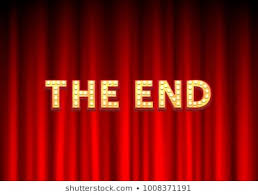